In [ ]:
def loss(x, y, theta):
    loss = 0
    for i in range(len(y)):
        loss = loss + (x[i].dot(theta) - y[i])**2
    return loss/(2*len(y))

In [ ]:
import pandas as pd
data = pd.read_csv('ex1data1.txt', sep=",", header=None)
data.columns = ['Население', 'Прибыль']
data
# y = a + b*x

,Население,Прибыль
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Text(0, 0.5, 'Прибыль')

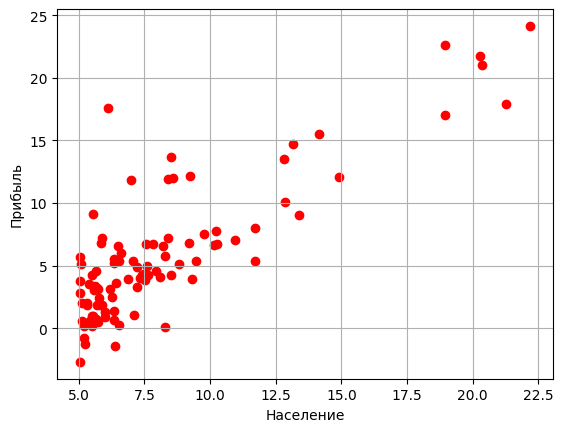

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.asarray(data['Население'])
y = np.asarray(data['Прибыль'])
fig = plt.subplots()
plt.grid(True)
plt.scatter(x, y, color='red')
plt.xlabel('Население')
plt.ylabel('Прибыль')

In [ ]:
def gradient_descent(x, y, theta, alpha, n_iterations):
    losses = np.zeros(n_iterations)
    for iter in range(n_iterations):
        grad = 1/len(x) * x.T.dot(x.dot(theta) - y)
        theta = theta - alpha * grad
        losses[iter] = loss(x, y, theta)
    return theta, losses

[0.44689026 0.51426734]


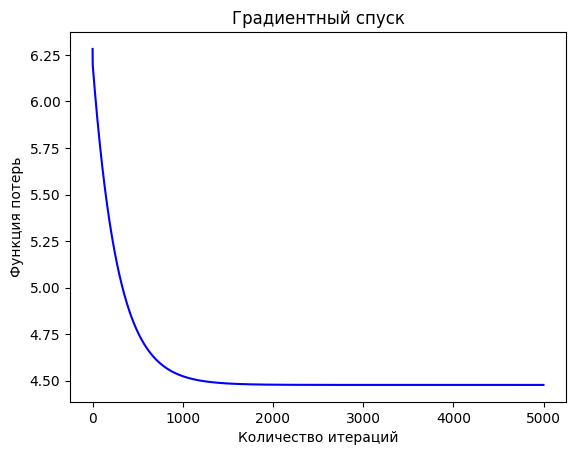

b: -3.895253231937139
a: 1.192980636387969


In [ ]:
x_b = np.c_[np.ones((len(x), 1)), x]
theta = np.random.randn(2,)
print(theta)
alpha = 0.01
n_iterations = 5000

theta, losses = gradient_descent(x_b, y, theta, alpha, n_iterations)


plt.plot(np.arange(n_iterations), losses, color='blue')
plt.xlabel('Количество итераций')
plt.ylabel('Функция потерь')
plt.title('Градиентный спуск')
plt.show()
intercept, slope = theta[0], theta[1]

print("b:", intercept)
print("a:", slope)

In [ ]:
def equation(theta,x):
  return theta[0] + theta[1]*x
population_1 = 5
population_2 = 10
profit_1 = equation(theta, population_1) * 10000
profit_2 = equation(theta, population_2) * 10000

print("Для", population_1*10000,":", profit_1)
print("Для", population_2*10000,":", profit_2)

Для 50000 : 20696.49950002705
Для 100000 : 80345.53131942548


In [ ]:
theta_norm = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

profit_1_normal = equation(theta_norm, population_1) * 10000
profit_2_normal = equation(theta_norm, population_2) * 10000

print("Разница в предсказаниях для методов при", population_1*10000, ":", abs(profit_1_normal - profit_1))
print("Разница в предсказаниях для методов при", population_2*10000, ":", abs(profit_2_normal - profit_2))

Разница в предсказаниях для методов при 50000 : 2.626073666036973
Разница в предсказаниях для методов при 100000 : 0.024316415321663953


In [ ]:
"""
theta = np.random.randn(2,1)
print(theta)
learning_rate = 0.01
n_iterations = 1000
x1 = np.c_[np.ones((len(x), 1)), x]
for iteration in range(n_iterations):
    #h = np.dot(np.transpose(x1), theta)
    #print(h)
    #L = 1/2*loss_function(h,y)
    #print(L)
    gradients = 1/len(x1) * x1.T.dot(x1.dot(theta) - y)
    print(len(gradients))
    theta = theta - learning_rate * gradients
intercept, slope = theta[0], theta[1]
print("b:", intercept)
print("a:", slope)
"""

'\ntheta = np.random.randn(2,1)\nprint(theta)\nlearning_rate = 0.01\nn_iterations = 1000\nx1 = np.c_[np.ones((len(x), 1)), x]\nfor iteration in range(n_iterations):\n    #h = np.dot(np.transpose(x1), theta)\n    #print(h)\n    #L = 1/2*loss_function(h,y)\n    #print(L)\n    gradients = 1/len(x1) * x1.T.dot(x1.dot(theta) - y)\n    print(len(gradients))\n    theta = theta - learning_rate * gradients\nintercept, slope = theta[0], theta[1]\nprint("b:", intercept)\nprint("a:", slope)\n'

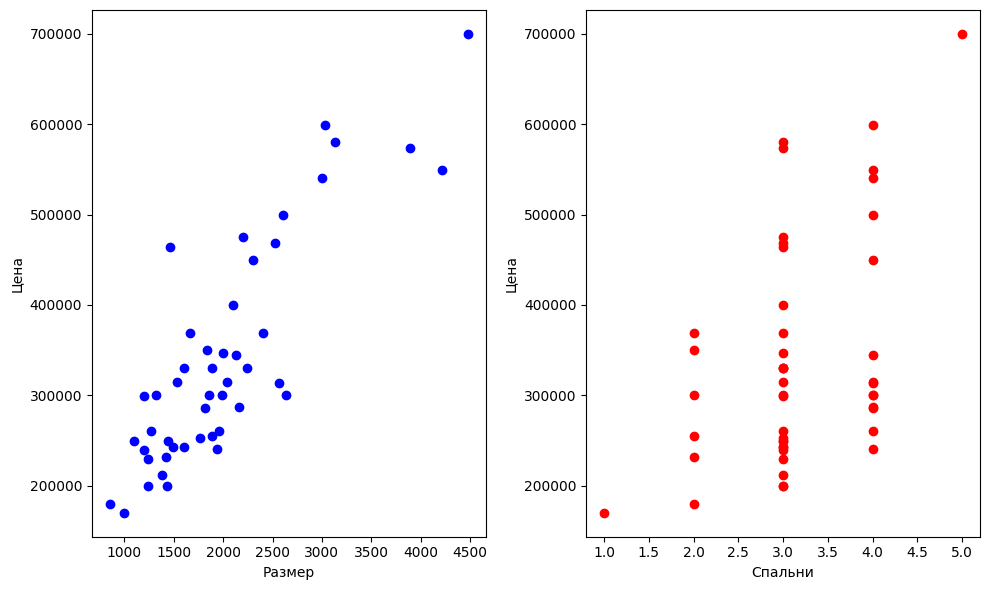

In [ ]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
x = data[:,:2]
y = data[:,2]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(x[:,0], y, color='b')
plt.xlabel('Размер')
plt.ylabel('Цена')

plt.subplot(1, 2, 2)
plt.scatter(x[:, 1], y, color='r')
plt.xlabel('Спальни')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()

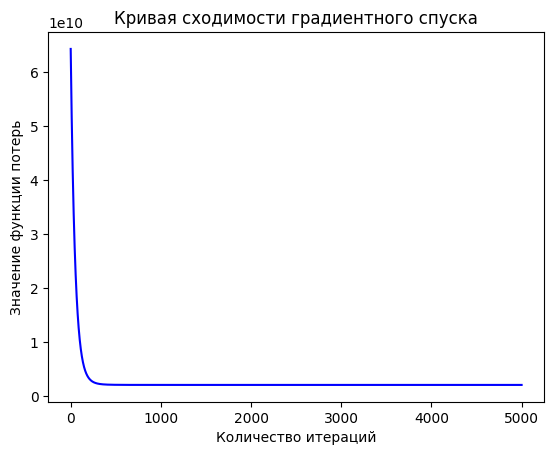

[340412.65957447 109447.79645425  -6578.35483877]


In [ ]:
def normalize(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    X_normalized = (x - mean) / std
    return X_normalized, mean, std
x_norm, mean, std = normalize(x)

alpha = 0.01
n_iterations = 5000

x_norm_1 = np.c_[np.ones(x_norm.shape[0]), x_norm]

theta = np.random.randn(3,)

theta, losses = gradient_descent(x_norm_1, y, theta, alpha, n_iterations)

plt.plot(np.arange(n_iterations), losses, color='blue')
plt.xlabel('Количество итераций')
plt.ylabel('Значение функции потерь')
plt.title('Кривая сходимости градиентного спуска')
plt.show()

print(theta)

In [ ]:
def predict_price(size, bedrooms, theta, mean, std):
    # Нормализация входных данных
    size_normalized = (size - mean[0]) / std[0]
    bedrooms_normalized = (bedrooms - mean[1]) / std[1]
    x = np.array([1, size_normalized, bedrooms_normalized])
    predicted_price = x.dot(theta)
    return predicted_price
size = 1500
bedrooms = 3
predicted_price = predict_price(size, bedrooms, theta, mean, std)
print("Цена", predicted_price)

Цена 272199.8632385709


In [ ]:
def normal_equation(x, y):
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta_norm = normal_equation(x_norm_1, y)
predicted_price_norm = predict_price(size, bedrooms, theta_norm, mean, std)
print("C помощью нормального уравнения", predicted_price_norm)
print("Погрешность = ", abs(predicted_price_norm - predicted_price))

C помощью нормального уравнения 272199.86323225225
Погрешность =  6.318674422800541e-06
